In [7]:
import pandas as pd

def carrega_e_formata_dados_covid_global():
    '''
    Carrega e formata os dados de COVID-19 global
    '''

    arquivo = '../data/WHO-COVID-19-global-data.csv'
    covid_global = pd.read_csv(arquivo, sep=';', encoding='utf-8')
    covid_global['Date_reported'] = pd.to_datetime(covid_global['Date_reported'], dayfirst=True)
    covid_global['Country_code'] = covid_global['Country_code'].fillna('?').astype('category')
    covid_global['Country'] = covid_global.Country.astype('category')
    covid_global['WHO_region'] = covid_global['WHO_region'].fillna('?').astype('category')
    covid_global['New_cases'] = covid_global['New_cases'].fillna(0).astype(int)
    covid_global['New_deaths'] = covid_global['New_deaths'].fillna(0).astype(int)

    covid_global = covid_global.rename(columns={
        'Date_reported': 'Data Reportada',
        'Country_code': 'Código do País',
        'Country': 'País',
        'WHO_region': 'Região OMS',
        'New_cases': 'Novos Casos',
        'Cumulative_cases': 'Casos Acumulados',
        'New_deaths': 'Novas Mortes',
        'Cumulative_deaths': 'Mortes Acumuladas',
    })

    return covid_global

def carrega_e_formata_dados_vacinacao_covid_global():
    '''
    Carrega e formata os dados de vacinação global
    '''

    arquivo = '../data/vaccination-data.csv'
    vacinacao = pd.read_csv(arquivo, sep=';', encoding='utf-8')
    vacinacao['WHO_REGION'] = vacinacao['WHO_REGION'].fillna('?').astype('category')
    vacinacao['FIRST_VACCINE_DATE'] = pd.to_datetime(vacinacao['FIRST_VACCINE_DATE'], dayfirst=True)
    
    vacinacao = vacinacao.drop(['ISO3', 'DATA_SOURCE', 'VACCINES_USED', 'DATE_UPDATED', 'NUMBER_VACCINES_TYPES_USED', vacinacao.columns[-1]], axis=1)

    vacinacao = vacinacao.rename(columns={
        'COUNTRY': 'País',
        'WHO_REGION': 'Região OMS',
        'FIRST_VACCINE_DATE': 'Data da Primeira Vacina',
        'TOTAL_VACCINATIONS': 'Total de Vacinações',
        'PERSONS_VACCINATED_1PLUS_DOSE': 'Pessoas Vacinadas 1+ Doses',
        'TOTAL_VACCINATIONS_PER100': 'Total de Vacinações por 100 Mil',
        'PERSONS_VACCINATED_1PLUS_DOSE_PER100': 'Pessoas Vacinadas 1+ Doses por 100 Mil',
        'PERSONS_LAST_DOSE': 'Pessoas com Última Dose',
        'PERSONS_LAST_DOSE_PER100': 'Pessoas com Última Dose por 100 Mil',
        'PERSONS_BOOSTER_ADD_DOSE': 'Pessoas com Dose de Reforço',
        'PERSONS_BOOSTER_ADD_DOSE_PER100': 'Pessoas com Dose de Reforço por 100 Mil',
    })

    vacinacao['Total de Vacinações por 100 Mil'] = vacinacao['Total de Vacinações por 100 Mil'] * 1000
    vacinacao['Pessoas Vacinadas 1+ Doses por 100 Mil'] = vacinacao['Pessoas Vacinadas 1+ Doses por 100 Mil'] * 1000
    vacinacao['Pessoas com Última Dose por 100 Mil'] = vacinacao['Pessoas com Última Dose por 100 Mil'] * 1000
    vacinacao['Pessoas com Dose de Reforço por 100 Mil'] = vacinacao['Pessoas com Dose de Reforço por 100 Mil'] * 1000

    vacinacao = vacinacao.dropna()

    return vacinacao

In [8]:
covid = carrega_e_formata_dados_covid_global()
vacina = carrega_e_formata_dados_vacinacao_covid_global()

In [9]:
covid.head(3)

,Data Reportada,Código do País,País,Região OMS,Novos Casos,Casos Acumulados,Novas Mortes,Mortes Acumuladas
0,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-19,AF,Afghanistan,EMRO,0,0,0,0


In [10]:
vacina.head(3)

,País,Região OMS,Total de Vacinações,Pessoas Vacinadas 1+ Doses,Total de Vacinações por 100 Mil,Pessoas Vacinadas 1+ Doses por 100 Mil,Pessoas com Última Dose,Pessoas com Última Dose por 100 Mil,Data da Primeira Vacina,Pessoas com Dose de Reforço,Pessoas com Dose de Reforço por 100 Mil
0,Aruba,AMRO,217124.0,90493.0,203000.0,85000.0,84363.0,79000.0,2021-02-17,35659.0,33000.0
1,Afghanistan,EMRO,23000000.0,19200000.0,59000.0,49000.0,18400000.0,47000.0,2021-02-22,2729940.0,7000.0
2,Angola,AFRO,27800000.0,16600000.0,85000.0,50000.0,9609080.0,29000.0,2021-03-10,3067091.0,9000.0


In [15]:
casos_totais = covid.groupby('País')[['Casos Acumulados', 'Mortes Acumuladas']].max().sort_values(by='País', ascending=False).reset_index()

C:\Users\JONAT\AppData\Local\Temp\ipykernel_9048\1702095610.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  casos_totais = covid.groupby('País')[['Casos Acumulados', 'Mortes Acumuladas']].max().sort_values(by='País', ascending=False).reset_index()


In [16]:
casos_totais.head(3)

,País,Casos Acumulados,Mortes Acumuladas
0,"occupied Palestinian territory, including east...",703228,5708
1,Zimbabwe,266386,5740
2,Zambia,349842,4077


In [31]:
df = pd.merge(casos_totais, vacina, on='País', how='inner')

In [32]:
df.head(3)

,País,Casos Acumulados,Mortes Acumuladas,Região OMS,Total de Vacinações,Pessoas Vacinadas 1+ Doses,Total de Vacinações por 100 Mil,Pessoas Vacinadas 1+ Doses por 100 Mil,Pessoas com Última Dose,Pessoas com Última Dose por 100 Mil,Data da Primeira Vacina,Pessoas com Dose de Reforço,Pessoas com Dose de Reforço por 100 Mil
0,Zimbabwe,266386,5740,AFRO,13900000.0,7525882.0,94000.0,51000.0,5662119.0,38000.0,2021-02-18,2299968.0,15000.0
1,Zambia,349842,4077,AFRO,13600000.0,11700000.0,74000.0,64000.0,9155551.0,50000.0,2021-04-14,1414619.0,8000.0
2,Wallis and Futuna,3760,9,WPRO,17303.0,7150.0,154000.0,64000.0,6803.0,60000.0,2021-03-19,3350.0,30000.0


In [62]:
df.shape[0]

173

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns


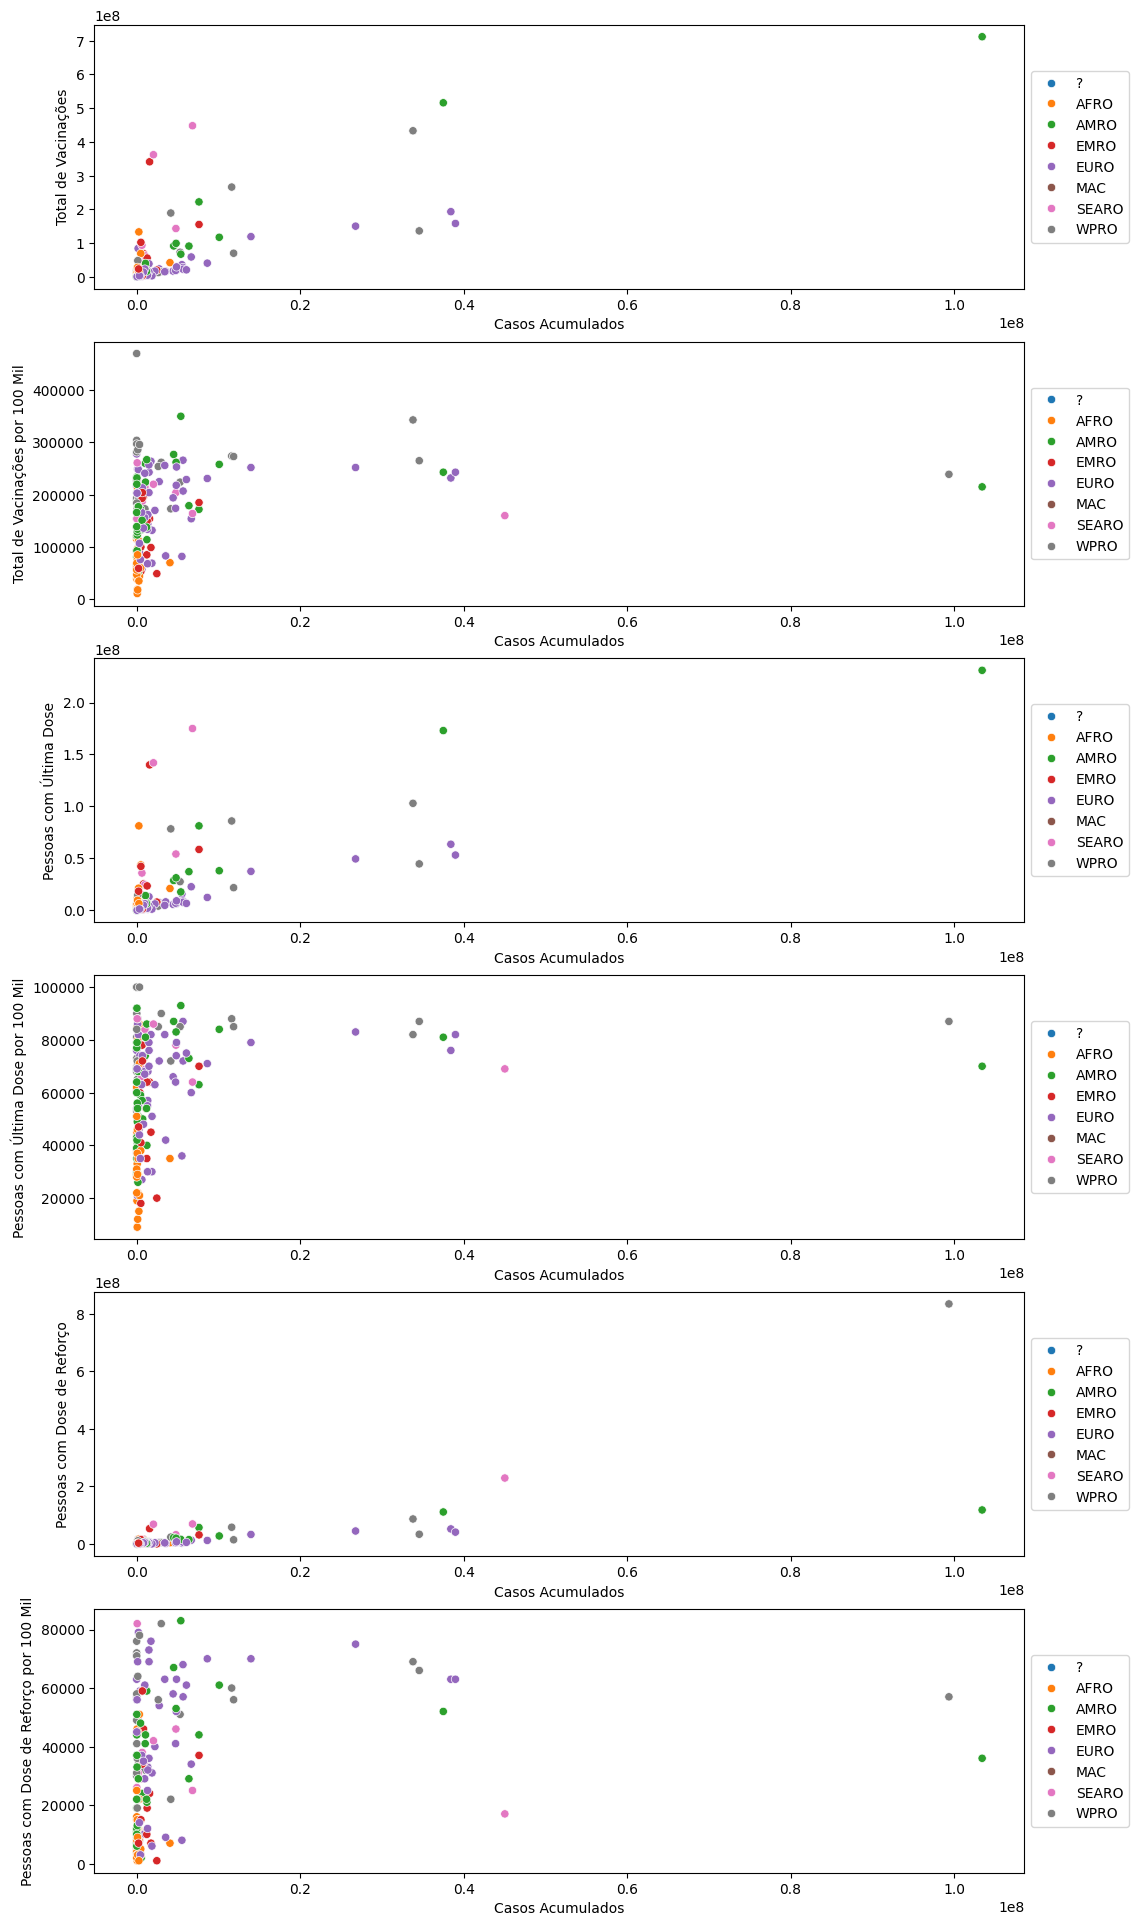

In [48]:
fig, axes = plt.subplots(6, 1, figsize=(12, 24))
axes = axes.flatten()

sns.scatterplot(data=df.query('`Total de Vacinações` <= 2000000000'), x='Casos Acumulados', y='Total de Vacinações', hue='Região OMS', ax=axes[0])
sns.scatterplot(data=df, x='Casos Acumulados', y='Total de Vacinações por 100 Mil', hue='Região OMS', ax=axes[1])

sns.scatterplot(data=df.query('`Pessoas com Última Dose` <= 750000000'), x='Casos Acumulados', y='Pessoas com Última Dose', hue='Região OMS', ax=axes[2])
sns.scatterplot(data=df, x='Casos Acumulados', y='Pessoas com Última Dose por 100 Mil', hue='Região OMS', ax=axes[3])

sns.scatterplot(data=df, x='Casos Acumulados', y='Pessoas com Dose de Reforço', hue='Região OMS', ax=axes[4])
sns.scatterplot(data=df, x='Casos Acumulados', y='Pessoas com Dose de Reforço por 100 Mil', hue='Região OMS', ax=axes[5])

for ax in axes:
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax = ax

C:\Users\JONAT\AppData\Local\Temp\ipykernel_9048\3289783605.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


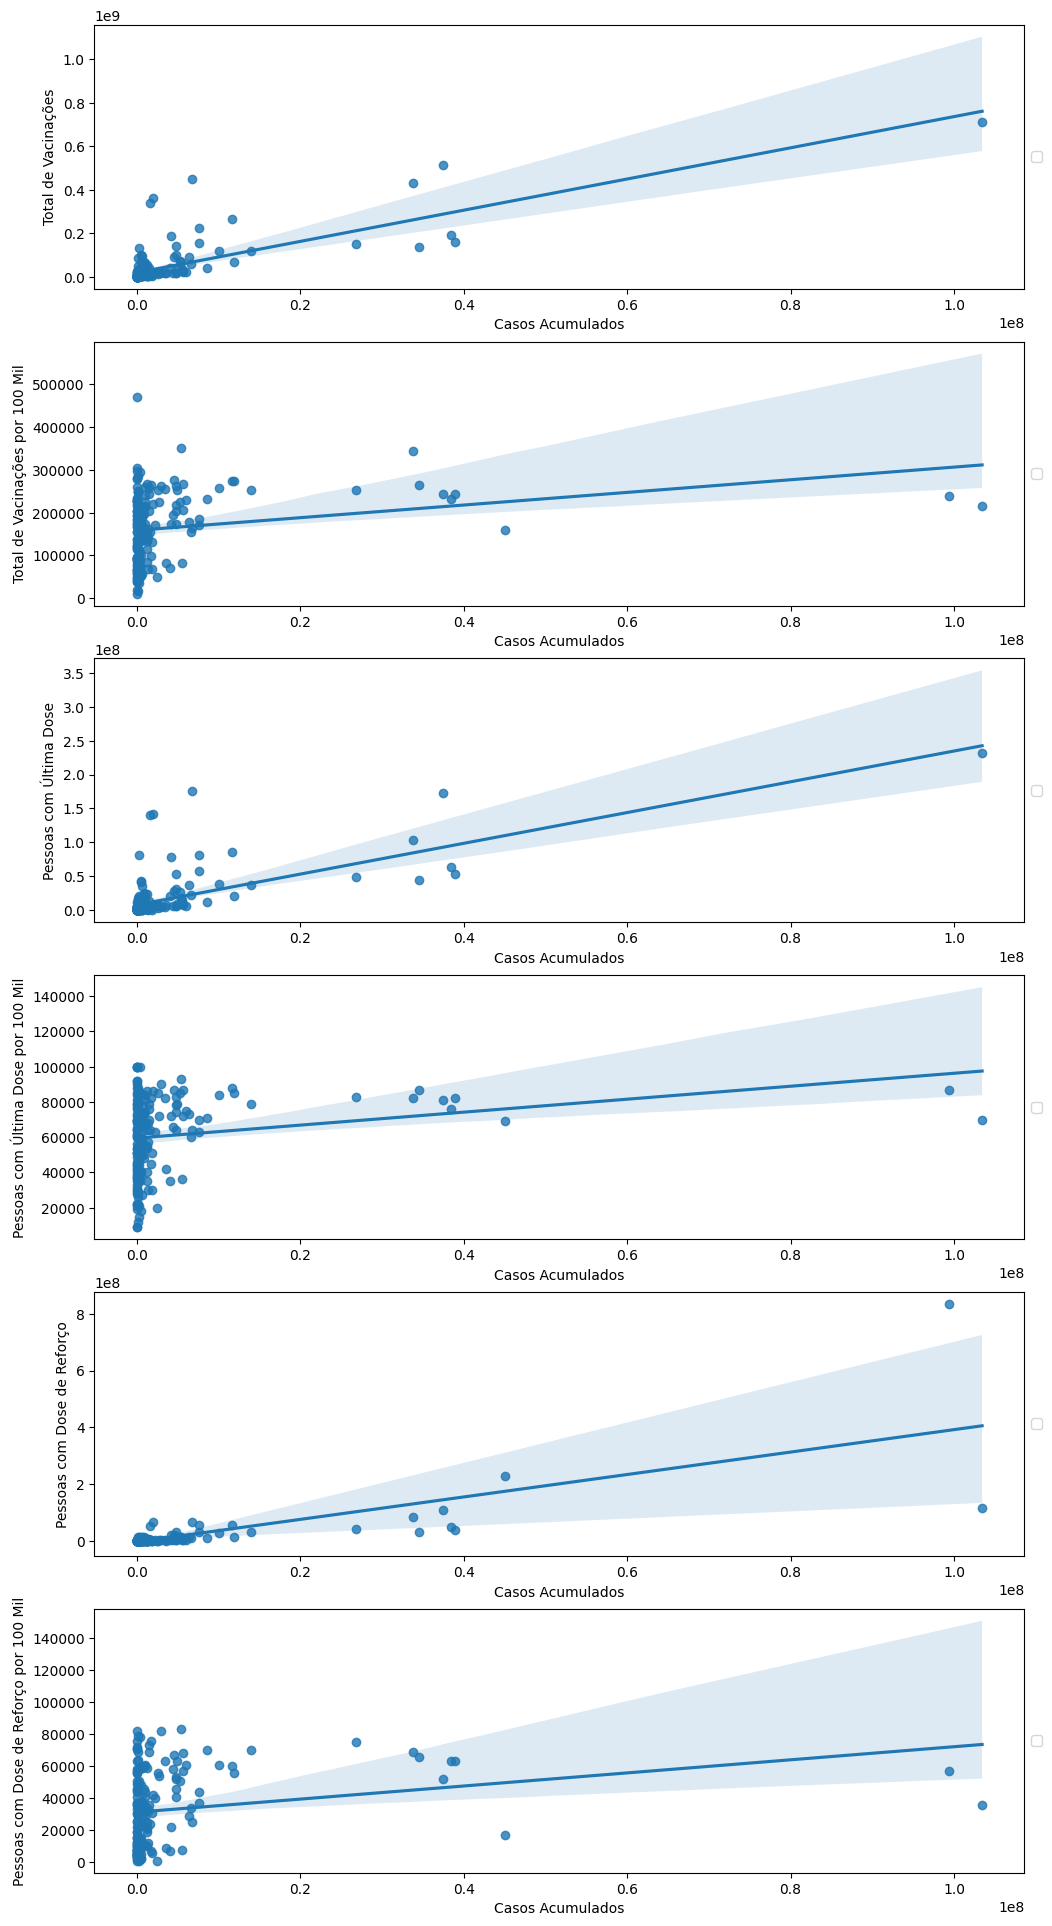

In [49]:
fig, axes = plt.subplots(6, 1, figsize=(12, 24))
axes = axes.flatten()

sns.regplot(data=df.query('`Total de Vacinações` <= 2000000000'), x='Casos Acumulados', y='Total de Vacinações', ax=axes[0])
sns.regplot(data=df, x='Casos Acumulados', y='Total de Vacinações por 100 Mil', ax=axes[1])

sns.regplot(data=df.query('`Pessoas com Última Dose` <= 750000000'), x='Casos Acumulados', y='Pessoas com Última Dose', ax=axes[2])
sns.regplot(data=df, x='Casos Acumulados', y='Pessoas com Última Dose por 100 Mil', ax=axes[3])

sns.regplot(data=df, x='Casos Acumulados', y='Pessoas com Dose de Reforço', ax=axes[4])
sns.regplot(data=df, x='Casos Acumulados', y='Pessoas com Dose de Reforço por 100 Mil', ax=axes[5])

for ax in axes:
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax = ax

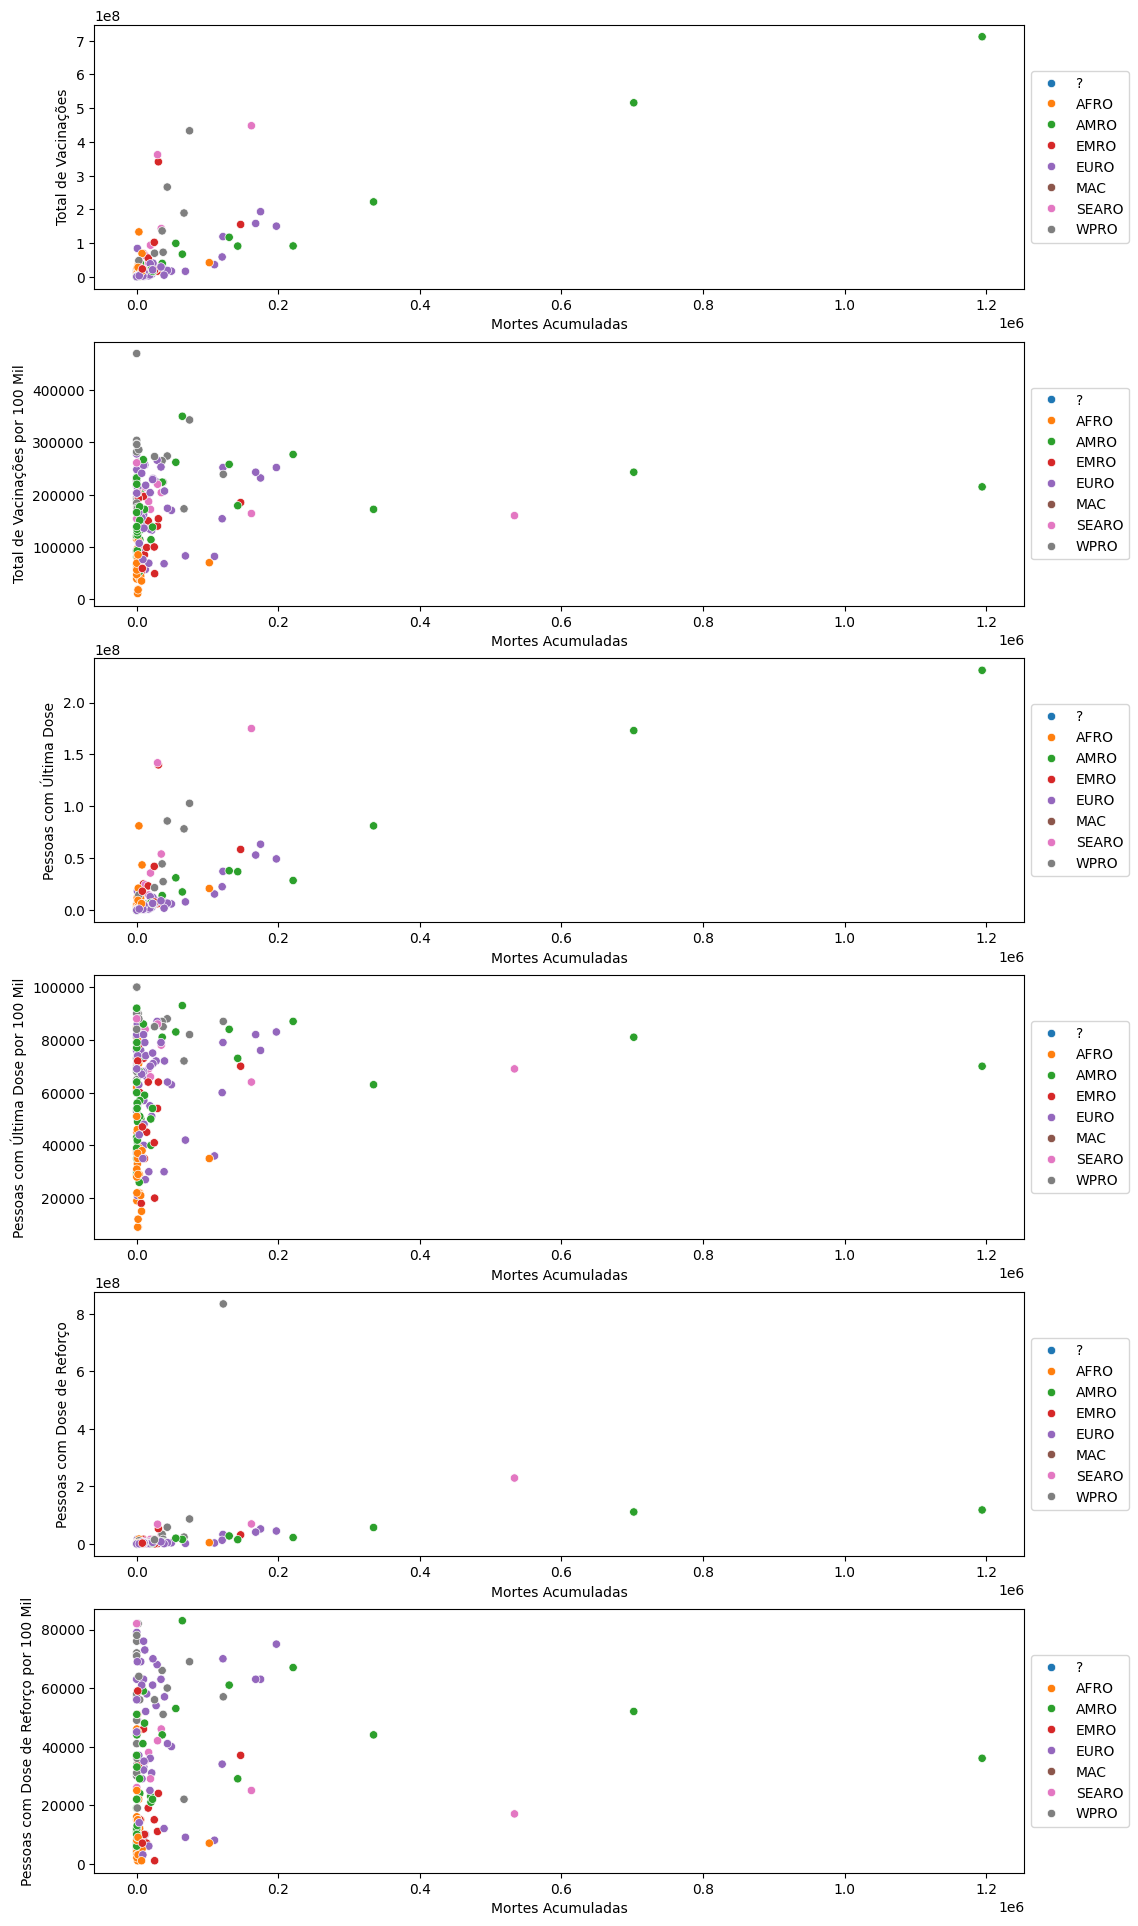

In [50]:
fig, axes = plt.subplots(6, 1, figsize=(12, 24))
axes = axes.flatten()

sns.scatterplot(data=df.query('`Total de Vacinações` <= 2000000000'), x='Mortes Acumuladas', y='Total de Vacinações', hue='Região OMS', ax=axes[0])
sns.scatterplot(data=df, x='Mortes Acumuladas', y='Total de Vacinações por 100 Mil', hue='Região OMS', ax=axes[1])

sns.scatterplot(data=df.query('`Pessoas com Última Dose` <= 750000000'), x='Mortes Acumuladas', y='Pessoas com Última Dose', hue='Região OMS', ax=axes[2])
sns.scatterplot(data=df, x='Mortes Acumuladas', y='Pessoas com Última Dose por 100 Mil', hue='Região OMS', ax=axes[3])

sns.scatterplot(data=df, x='Mortes Acumuladas', y='Pessoas com Dose de Reforço', hue='Região OMS', ax=axes[4])
sns.scatterplot(data=df, x='Mortes Acumuladas', y='Pessoas com Dose de Reforço por 100 Mil', hue='Região OMS', ax=axes[5])

for ax in axes:
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

C:\Users\JONAT\AppData\Local\Temp\ipykernel_9048\3745180123.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


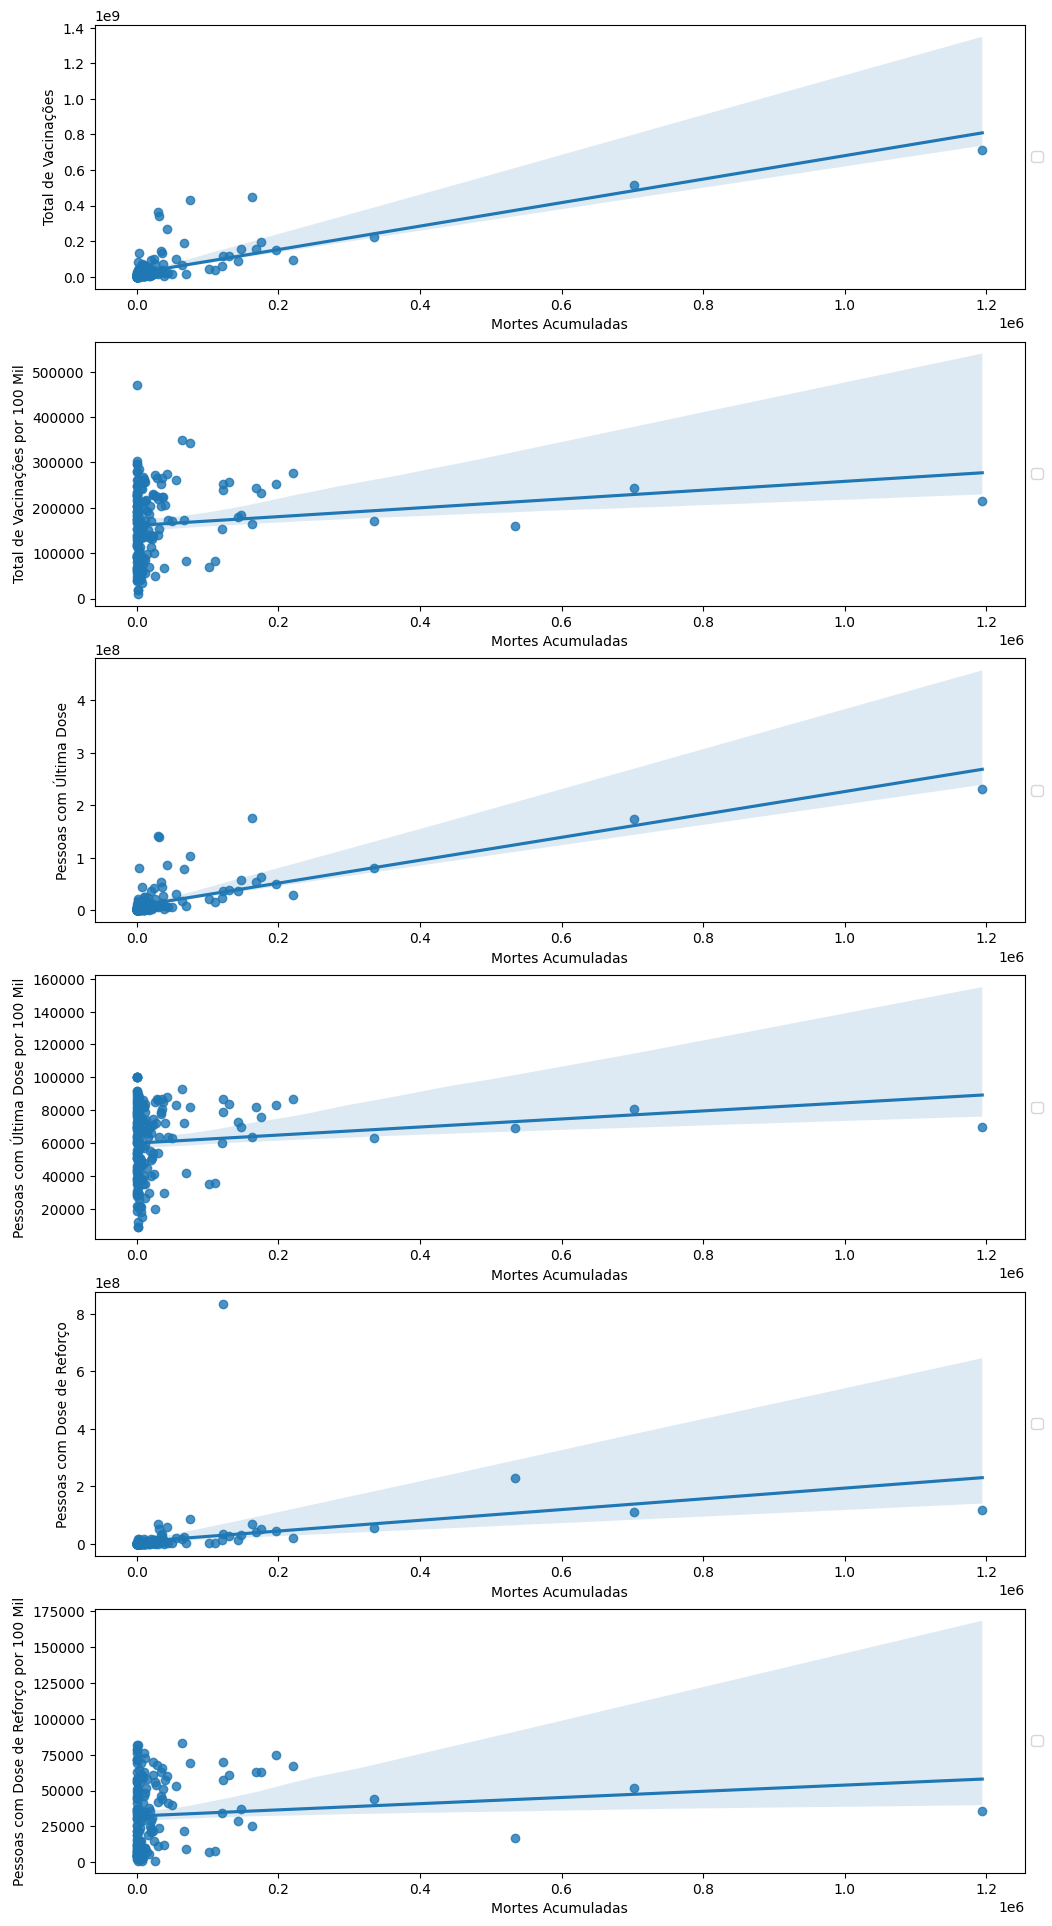

In [51]:
fig, axes = plt.subplots(6, 1, figsize=(12, 24))
axes = axes.flatten()

sns.regplot(data=df.query('`Total de Vacinações` <= 2000000000'), x='Mortes Acumuladas', y='Total de Vacinações', ax=axes[0])
sns.regplot(data=df, x='Mortes Acumuladas', y='Total de Vacinações por 100 Mil', ax=axes[1])

sns.regplot(data=df.query('`Pessoas com Última Dose` <= 750000000'), x='Mortes Acumuladas', y='Pessoas com Última Dose', ax=axes[2])
sns.regplot(data=df, x='Mortes Acumuladas', y='Pessoas com Última Dose por 100 Mil', ax=axes[3])

sns.regplot(data=df, x='Mortes Acumuladas', y='Pessoas com Dose de Reforço', ax=axes[4])
sns.regplot(data=df, x='Mortes Acumuladas', y='Pessoas com Dose de Reforço por 100 Mil', ax=axes[5])

for ax in axes:
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<Axes: ylabel='Mortes Acumuladas'>

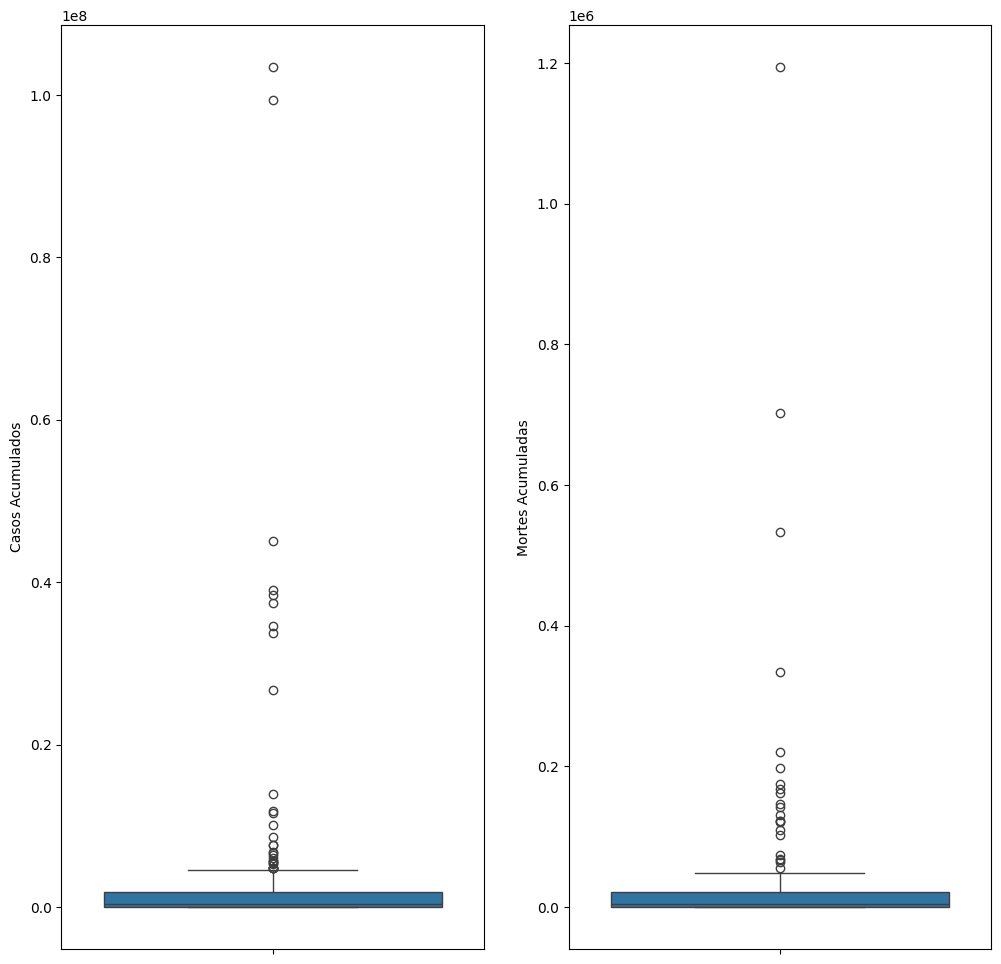

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
axes = axes.flatten()

sns.boxplot(data=df, y='Casos Acumulados', ax=axes[0])
sns.boxplot(data=df, y='Mortes Acumuladas', ax=axes[1])

<Axes: ylabel='Mortes Acumuladas'>

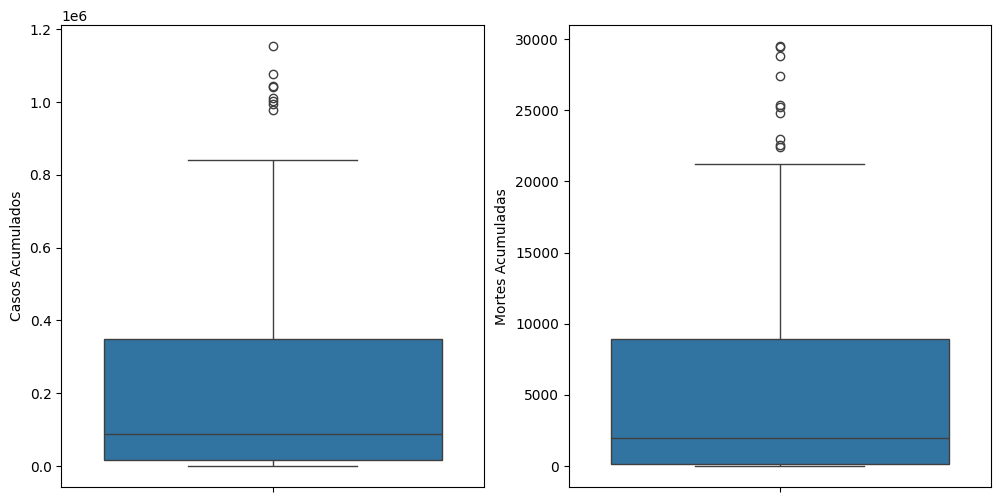

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()

sns.boxplot(data=df.query('`Casos Acumulados` <= 1200000'), y='Casos Acumulados', ax=axes[0])
sns.boxplot(data=df.query('`Mortes Acumuladas` <= 30000'), y='Mortes Acumuladas', ax=axes[1])

In [69]:
print('Tota Casos Acumulados após remover alguns outliers', df.query('`Casos Acumulados` <= 1200000').shape[0])
print('Tota Mortes Acumuladas após remover alguns outliers', df.query('`Mortes Acumuladas` <= 30000').shape[0])

Tota Casos Acumulados após remover alguns outliers 114
Tota Mortes Acumuladas após remover alguns outliers 140


In [70]:
casos_outliers_removidos = df.query('`Casos Acumulados` <= 1200000')
mortes_outliers_removidos = df.query('`Mortes Acumuladas` <= 30000')

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor

In [99]:
X = casos_outliers_removidos[['Região OMS', 'Total de Vacinações', 'Pessoas com Última Dose', 'Pessoas com Dose de Reforço']]
y = casos_outliers_removidos['Casos Acumulados']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), 'Região OMS'),
        ('scaler_vacinas', MinMaxScaler(), ['Total de Vacinações']),
        ('scaler_ultima_dose', MinMaxScaler(), ['Pessoas com Última Dose']),
        ('scaler_reforco', MinMaxScaler(), ['Pessoas com Dose de Reforço'])
    ]
)

pipeline_normalization = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

dummy = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DummyRegressor())
])

In [113]:
OneHotEncoder().fit_transform(casos_outliers_removidos['Região OMS'].to_frame())

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 114 stored elements and shape (114, 6)>

0.23846793085981322